# Data Load

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = "./Dataset/"

data = pd.read_csv(path+"kwproja_data.csv")
data

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,201703,95662180105,닥터빈스,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,201703,1140530114,전주식당,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,201703,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,201702,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,201702,88958530107,아디다스퍼포먼스타임스퀘어,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153390,201801,45688770211,(주)스위틀,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
153391,201712,65130960211,젤 에스테틱,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
153392,201712,708600354,카카오아이엑스 주식회사,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
153393,201712,51363910128,월드타워약국,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


# EDA

153395 rows X 31 columns

- 매장 속성 정보
  - shop_code -> 식별자 feature, input feature로는 사용하지 않지만 분류를 위해서는 사용할 수 있을 것 같음  
  - shop_name -> input feature로는 사용하지 않음 (NLP deep learning 가능성 있음)
  - longtitude : 경도, latitude : 위도 -> 매장 위치 (회사 근처, 학교 근처 등 매출 영향성 있음)
  - shop_type_big -> 14 category  -> 업종 (매출 영향성 있음)
  - shop_type_small -> 367 category

- 매출 정보
  - date -> 12 category, 201702~ 201801 까지의 data
  - monthly_gain / avearge_sale_price = 한달 총 판매수

- 매출 통계 정보
  - weekday0~6 : 일 ~ 월
  - time -> 05_10 / 10_14 / 14_18 / 18_20 / 20_22 / 22_24 / 24_05 => 시간대가 동일하지 않음
    - 새벽대는 찾는 손님 적어 시간 길게 잡았을 것
    - 저녁 시간대는 가장 매출이 많이 이뤄지는 prime time 이라 시간대를 짧게 잡았을 것
  - female/male : 20/30/40/50 -> 8 columns



##### monthly_gain과 average_sale_price 중 어느 것을 y값으로 둘 것인가? : y_label 비교해보아야 할 것 같음 
- 월매출 예측 문제로 가정하고 montly_gain 을 y값으로 예측하는 모델 만들기

##### shop_code와 관련해서 input feature에 분류해서 넣어야 하는가? 상관없는가? 
- 특별한 브랜드가 y값을 결정하는 과적합 요소가 될 수 있으므로
- X 에서 shop code, shop name 제외하는 것도 방법
- 어느 위치에 어떤 업종으로 어떤 객단가인 매장을 오픈하면 월매출이 어떻게 될까? 문제
 - X: shop type big, shop type small, longitude, latitude, avg_sale_price, 
 - y: montly_gain

In [3]:
data.head()

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,201703,95662180105,닥터빈스,음식,카페 일반,126.927911,37.558043,5696400.0,9982,9.58,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,201703,1140530114,전주식당,음식,한정식/백반 전문점,127.022532,37.506856,8496120.0,14503,5.08,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,201703,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,103651502.5,72527,10.51,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,201702,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,96785751.0,70225,12.10,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,201702,88958530107,아디다스퍼포먼스타임스퀘어,소매,스포츠용품 판매,126.903306,37.517063,126635883.6,91884,15.04,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00


In [4]:
data.columns

Index(['date', 'shop_code', 'shop_name', 'shop_type_big', 'shop_type_small',
       'longitude', 'latitude', 'monthly_gain', 'average_sale_price',
       'female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50', 'weekday0', 'weekday1', 'weekday2',
       'weekday3', 'weekday4', 'weekday5', 'weekday6', 'time_05_10',
       'time_10_14', 'time_14_18', 'time_18_20', 'time_20_22', 'time_22_24',
       'time_00_05'],
      dtype='object')

In [5]:
data.dtypes

date                    int64
shop_code               int64
shop_name              object
shop_type_big          object
shop_type_small        object
longitude             float64
latitude              float64
monthly_gain          float64
average_sale_price      int64
female_20             float64
female_30             float64
female_40             float64
female_50             float64
male_20               float64
male_30               float64
male_40               float64
male_50               float64
weekday0              float64
weekday1              float64
weekday2              float64
weekday3              float64
weekday4              float64
weekday5              float64
weekday6              float64
time_05_10            float64
time_10_14            float64
time_14_18            float64
time_18_20            float64
time_20_22            float64
time_22_24            float64
time_00_05            float64
dtype: object

In [6]:
# 13633 
# 13352
# shop_name과 shop_code가 항상 같다면, 위 두 숫자가 같아야 하는데 약 300개의 data가 차이가 남 
# shop_code는 동일하지만(가게는 동일하지만) 업종, 가게명이 바뀌었을 수도 있음 -> shop_code를 식별자 feature로 사용
print(data['shop_name'].nunique())
print(data['shop_code'].nunique())
print(data['longitude'].nunique())
print(data['latitude'].nunique())
print(data['shop_type_big'].nunique())
print(data['shop_type_small'].nunique())
print(data['date'].unique())

13633
13352
3845
3845
14
367
[201703 201702 201705 201704 201707 201706 201709 201708 201711 201710
 201712 201801]


In [32]:
# shop code 를 group by 했을 때 그 안에 몇 종류의 shop name이 있는지 (1이어야 정상)
check_df = data.groupby('shop_code')['shop_name'].nunique().to_frame('shop_name_unique').reset_index()
check_df

,shop_code,shop_name_unique
0,60200446,1
1,60510211,1
2,68700298,1
3,80210201,1
4,82690502,1
...,...,...
13347,99912790101,1
13348,99931830105,1
13349,99950230203,1
13350,99971000120,1


In [29]:
# shop code안에 여러 shop name 있는 경우
check_df2[check_df2['shop_name_unique'] > 1]

,shop_code,shop_name_unique
42,148500219,4
129,308700726,4
159,348700564,2
351,668500219,3
373,708600354,7
...,...,...
13119,96988110220,5
13123,97058190605,4
13129,97238180201,5
13282,99208740105,6


In [31]:
# 롯데 월드 안에  놀이기구도 있지만, 편의점, 호텔 등 다는 업종 매출로 잡히는 것들도 있음!
# 결론-> shop code, shop name 은 모델입력으로 적합하지 않음
# 업종 별 매출 예측으로만 봐야 적당할 것으로 보임
data[data['shop_code'] == 148500219]

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
2209,201703,148500219,(주)롯데월드,관광/여가/오락,종합위락시설,127.098024,37.511472,8.077533e+09,16223,22.14,...,8.11,18.37,29.41,13.38,40.18,25.45,14.15,6.57,0.25,0.01
2303,201702,148500219,(주)롯데월드,관광/여가/오락,종합위락시설,127.098024,37.511472,1.168749e+10,17802,17.03,...,14.40,11.53,17.33,18.19,40.34,24.04,11.97,5.26,0.20,0.01
9653,201703,148500219,(주)호텔롯데롯데월드,관광/여가/오락,종합위락시설,127.098024,37.511472,1.838370e+08,15464,4.75,...,6.63,17.92,31.97,6.29,52.55,33.35,7.31,0.50,0.00,0.00
11538,201702,148500219,(주)호텔롯데롯데월드,관광/여가/오락,종합위락시설,127.098024,37.511472,1.680387e+08,17158,2.59,...,17.31,6.00,20.68,6.23,56.74,31.08,5.89,0.05,0.00,0.00
18315,201702,148500219,(주) 호텔롯데롯데월드,소매,편의점,127.098024,37.511472,2.459901e+08,4136,20.14,...,14.26,13.50,15.53,17.20,29.62,23.21,13.54,9.70,6.19,0.54
18316,201703,148500219,(주) 호텔롯데롯데월드,소매,편의점,127.098024,37.511472,2.237060e+08,4026,20.71,...,11.54,17.13,20.28,18.38,29.61,22.75,13.53,9.62,5.35,0.76
21113,201702,148500219,(주)호텔롯데롯데월드,숙박,호텔/콘도,127.098024,37.511472,1.999379e+08,9567,13.80,...,15.96,10.68,16.48,5.81,45.34,26.77,15.26,6.82,0.00,0.00
21254,201703,148500219,(주)호텔롯데롯데월드,숙박,호텔/콘도,127.098024,37.511472,1.362055e+08,8612,15.59,...,7.66,18.60,28.46,5.73,46.05,26.44,15.38,6.39,0.00,0.00
21762,201703,148500219,(주)호텔롯데 롯데월드 게임,관광/여가/오락,종합위락시설,127.098024,37.511472,4.197055e+07,6373,18.98,...,7.09,19.82,32.70,2.56,25.26,37.60,20.80,11.76,2.02,0.00
23091,201702,148500219,(주)호텔롯데 롯데월드 게임,관광/여가/오락,종합위락시설,127.098024,37.511472,6.776416e+07,6569,14.04,...,15.28,11.28,16.91,2.66,33.07,33.88,16.91,12.26,1.22,0.00


In [33]:
# shop_code는 동일하지만 shop_name이 바뀌는 것을 확인
# 보통은 13(12)개의 data가 있는 반면 이렇게 name이 바뀌는 경우 row data 수가 36개까지 증가하는 것으로 보임
data[data['shop_code'] == 68608110104]

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
6709,201703,68608110104,(주)하이마트압구정지점,소매,가전제품 소매,127.027419,37.519889,2.586974e+09,789325,3.83,...,22.44,9.67,18.95,1.75,35.07,29.77,22.19,11.22,0.00,0.0
6832,201702,68608110104,(주)하이마트압구정지점,소매,가전제품 소매,127.027419,37.519889,1.548152e+09,594177,3.71,...,12.88,8.24,22.15,4.14,30.93,34.10,25.06,5.77,0.00,0.0
11483,201703,68608110104,롯데하이마트(주)잠실지점,소매,가전제품 소매,127.098024,37.511472,3.243138e+09,314498,5.42,...,9.18,12.09,23.49,2.59,30.16,34.46,18.63,14.01,0.16,0.0
11591,201702,68608110104,롯데하이마트(주)잠실지점,소매,가전제품 소매,127.098024,37.511472,2.998128e+09,322712,5.52,...,8.96,12.76,20.97,1.49,30.42,33.34,22.97,9.36,2.42,0.0
23312,201703,68608110104,롯데하이마트(주)월드타워지점,소매,가전제품 소매,127.103491,37.513101,3.131850e+09,364162,11.29,...,5.85,15.98,21.23,0.51,22.39,39.45,16.85,19.77,1.04,0.0
23313,201702,68608110104,롯데하이마트(주)월드타워지점,소매,가전제품 소매,127.103491,37.513101,2.851156e+09,341876,11.77,...,8.31,10.95,21.98,0.88,23.16,40.85,22.08,12.89,0.15,0.0
30639,201704,68608110104,(주)하이마트압구정지점,소매,가전제품 소매,127.027419,37.519889,1.784357e+09,709565,1.64,...,8.85,7.31,14.67,1.02,34.19,35.55,20.54,8.70,0.00,0.0
34731,201705,68608110104,(주)하이마트압구정지점,소매,가전제품 소매,127.027419,37.519889,1.933278e+09,679373,5.74,...,18.52,14.90,9.66,1.14,28.82,37.07,20.32,12.65,0.00,0.0
35480,201705,68608110104,롯데하이마트(주)잠실지점,소매,가전제품 소매,127.098024,37.511472,2.730470e+09,315031,5.14,...,10.68,13.66,22.10,1.46,27.48,31.25,24.88,14.90,0.04,0.0
35530,201704,68608110104,롯데하이마트(주)잠실지점,소매,가전제품 소매,127.098024,37.511472,2.641395e+09,319231,6.83,...,6.76,14.99,19.28,2.43,26.85,30.62,27.84,12.00,0.26,0.0


In [24]:
check_df[check_df['shop_code_cnt'] != check_df['shop_name_cnt']]

,shop_code,shop_code_cnt,shop_name_cnt


In [34]:
data['monthly_gain'].value_counts()

0.0           3605
501000.0        57
255500.0        54
507000.0        54
150300.0        48
              ... 
44088912.0       1
11022270.0       1
22044649.0       1
10752963.0       1
3424211.0        1
Name: monthly_gain, Length: 114882, dtype: int64

## Graph (EDA)

In [38]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
#font_path = "C:/Windows/Fonts/NGULIM.TTF"
#font = fm.FontProperties().get_name()
#rc('font', family=font)


In [39]:
def view_price_hist(label) : 
    plt.hist(data[label])
    plt.title('price hist')
    plt.show()

def view_price_graph(label) :
    plt.subplot(211)
    plt.plot(data[label])
    plt.show()

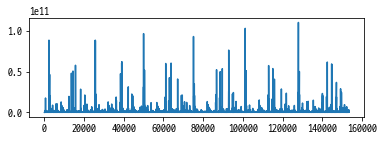

In [40]:
view_price_graph('monthly_gain')

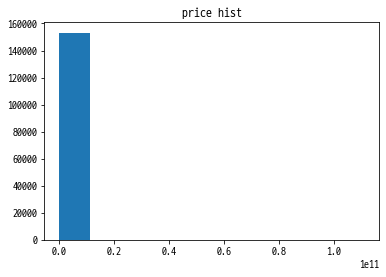

In [41]:
view_price_hist('monthly_gain')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

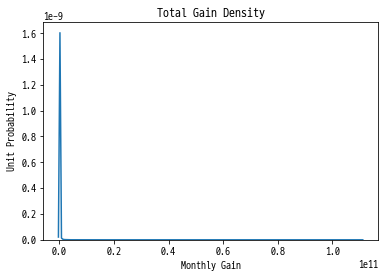

In [42]:
ax = plt.subplots()
ax = sns.distplot(data['monthly_gain'], hist=False)
ax.set_title('Total Gain Density')
ax.set_xlabel('Monthly Gain')
ax.set_ylabel('Unit Probability')

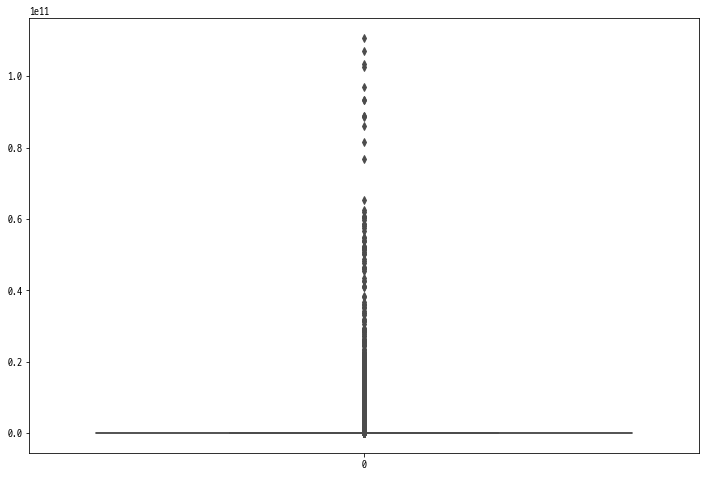

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data['monthly_gain'], color='red')
plt.show()

# Preprocessing
- shop_code, shop_name : 식별자 feature 이므로 drop 
- shop_type_big, shop_type_small : label encodding
- longitude, latitude : 일단은 input_feature에 넣지만 중복값이 많아 보이므로 추후에 제거해보려 함 
- monthly_gain : 결측치 제거 (0값, 3605개로 계산됨)
- MinMaxSaclar 정규화 -> 정규화 column의 범위는??
- date : drop, (그러나 RNN, LSTM과 같은 DL 모델에서는 넣어야 할지도..? 시계열 데이터이므로 쓸 수도 없을지도)


In [53]:
# 원본 data와 따로 관리 -> original data = data, input data = input_data 
# feature drop
input_data = data.copy()

input_data = input_data.drop(['date', 'shop_code', 'shop_name'], axis=1)
input_data

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,5.43,18.68,4.63,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,12.12,9.68,8.15,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,9.64,4.05,3.57,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,11.48,6.31,4.77,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,10.48,16.90,9.56,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153390,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,0.00,25.35,22.82,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
153391,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,0.00,46.48,44.72,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
153392,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,14.62,9.13,2.91,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
153393,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,18.09,9.60,9.93,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


In [46]:
# # LabelEncoder
# from sklearn.preprocessing import LabelEncoder

# lencoder = LabelEncoder()

# item_big = input_data['shop_type_big'].unique()
# lencoder.fit(item_big)
# input_data['shop_type_big'] = lencoder.transform(input_data['shop_type_big'])

# item_small = input_data['shop_type_small'].unique() 
# lencoder.fit(item_small)
# input_data['shop_type_small'] = lencoder.transform(input_data['shop_type_small'])

# input_data

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,8,308,126.927911,37.558043,5.696400e+06,9982,9.58,5.43,18.68,4.63,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,8,350,127.022532,37.506856,8.496120e+06,14503,5.08,12.12,9.68,8.15,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,8,17,127.025013,37.505696,1.036515e+08,72527,10.51,9.64,4.05,3.57,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,8,17,127.025013,37.505696,9.678575e+07,70225,12.10,11.48,6.31,4.77,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,5,173,126.903306,37.517063,1.266359e+08,91884,15.04,10.48,16.90,9.56,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153390,13,327,127.040033,37.525081,2.277527e+07,1114250,0.00,0.00,25.35,22.82,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
153391,5,361,127.046604,37.524470,1.555300e+06,33556,0.00,0.00,46.48,44.72,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
153392,5,261,127.060835,37.509203,3.134106e+08,39543,31.27,14.62,9.13,2.91,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
153393,10,193,127.103491,37.513101,7.927725e+07,9874,23.15,18.09,9.60,9.93,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


In [48]:
# # LabelEncoder
# from sklearn.preprocessing import LabelEncoder

# lencoder = LabelEncoder()

# item_big = input_data['shop_type_big'].unique()
# lencoder.fit(item_big)
# lencoder.classes_  #?

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [54]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

input_data['shop_type_big'] = le.fit_transform(list(input_data['shop_type_big']))   # fit transform으로 한번에 처리 가능
le.classes_

array(['nan', '관광/여가/오락', '기술서비스', '도매/유통/무역', '부동산', '생활서비스', '소매', '숙박',
       '스포츠', '음식', '음식 ', '의료', '전자/정보통신', '제조', '학문/교육'], dtype='<U8')

In [55]:
le = LabelEncoder()

input_data['shop_type_small'] = le.fit_transform(list(input_data['shop_type_small'])) 
le.classes_

array(['nan', '가구 제조', '가구 판매-중고', '가발 판매', '가방 제조', '가방/구두 수선',
       '가전기기/용품 설비', '가전제품 도매', '가전제품 소매', '가정용품 수리', '가죽/모피제품 판매',
       '건강/헬스용품 판매/수리', '건강식품 판매', '건축물시설관리', '건축용자제/용품 판매', '결혼상담소',
       '경양식 전문점', '고기 부페', '고기구이 전문점', '고속도로 휴게소', '고시원', '골동품/예술품 수집',
       '골동품/예술품 판매', '골프연습장', '골프용품 판매', '곱창/양구이 전문점', '공예품 판매',
       '과학기기 도매', '관광유흥주점', '광고기획', '광고물/간판 제작', '광고재료 도매', '교복 판매',
       '구내식당/자급식음식점', '구판장/직판장', '국수/수제비 전문점', '귀금속/장신구 제조', '귀금속/장신구 판매',
       '그릇 판매', '그림/액자 판매', '기술서비스-기타', '기타세계요리 전문점', '기타일반 유흥주점',
       '기호식품도매', '꽃집/꽃배달', '나이트클럽', '낙지/문어/오징어/쭈꾸미 전문점', '냉동냉장/냉난방기기 제조',
       '냉동냉장/냉난방기기 판매', '냉면 전문점', '네일케어', '노래방', '농산물 판매', '농축산물 판매',
       '당구장', '도너츠 전문점', '도료/페인트 판매', '도시락 전문점', '독서실', '돈가스 전문점',
       '등산용품 판매', '떡/한과 전문점', '렌터카', '룸살롱/단란주점', '마라/양꼬치 전문점', '멀티방',
       '면 전문점', '면세백화점', '모조신변잡화 도매', '모텔', '모형/교구 제조', '목욕탕',
       '무도유흥주점-종합', '무억업', '무역업-기타', '무예/투기 도장', '무용복 판매', '문구용품 도매',
       '문구용품 소매', '문구용품 판매', '문화센터'

In [56]:
input_data['shop_type_big'].value_counts()

9     51202
6     49197
11    16774
5     16698
14     4739
0      4468
1      3706
3      2738
8      1614
7      1236
13      545
4       345
12      103
2        23
10        7
Name: shop_type_big, dtype: int64

In [57]:
# 결측치 제거 
drop_index = input_data[input_data['monthly_gain']==0].index 
input_data = input_data.drop(drop_index)
input_data

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,9,309,126.927911,37.558043,5.696400e+06,9982,9.58,5.43,18.68,4.63,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,9,351,127.022532,37.506856,8.496120e+06,14503,5.08,12.12,9.68,8.15,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,9,18,127.025013,37.505696,1.036515e+08,72527,10.51,9.64,4.05,3.57,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,9,18,127.025013,37.505696,9.678575e+07,70225,12.10,11.48,6.31,4.77,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,6,174,126.903306,37.517063,1.266359e+08,91884,15.04,10.48,16.90,9.56,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153390,14,328,127.040033,37.525081,2.277527e+07,1114250,0.00,0.00,25.35,22.82,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
153391,6,362,127.046604,37.524470,1.555300e+06,33556,0.00,0.00,46.48,44.72,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
153392,6,262,127.060835,37.509203,3.134106e+08,39543,31.27,14.62,9.13,2.91,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
153393,11,194,127.103491,37.513101,7.927725e+07,9874,23.15,18.09,9.60,9.93,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


In [58]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_cols = input_data.columns.tolist()
scaled_data = scaler.fit_transform(input_data[scale_cols])
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = scale_cols 

input_data = scaled_data
input_data

,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,female_30,female_40,female_50,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,0.642857,0.841962,0.128587,0.843021,0.000051,0.000121,0.0958,0.0543,0.1868,0.046295,...,0.1715,0.1192,0.0634,0.0115,0.7278,0.2314,0.0293,0.0000,0.0000,0.0000
1,0.642857,0.956403,0.598197,0.143170,0.000077,0.000176,0.0508,0.1212,0.0968,0.081492,...,0.1938,0.1635,0.1082,0.0083,0.7682,0.1325,0.0909,0.0000,0.0000,0.0000
2,0.642857,0.049046,0.610510,0.127312,0.000936,0.000881,0.1051,0.0964,0.0405,0.035696,...,0.2118,0.2159,0.1804,0.0464,0.0850,0.0240,0.1867,0.5005,0.0984,0.0589
3,0.642857,0.049046,0.610510,0.127312,0.000874,0.000853,0.1210,0.1148,0.0631,0.047695,...,0.2608,0.2260,0.1551,0.0268,0.0809,0.0577,0.1015,0.5461,0.1625,0.0245
4,0.428571,0.474114,0.006469,0.282728,0.001143,0.001116,0.1504,0.1048,0.1690,0.095590,...,0.1644,0.1038,0.2271,0.0043,0.2638,0.3920,0.2530,0.0869,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149785,1.000000,0.893733,0.685052,0.392348,0.000206,0.013529,0.0000,0.0000,0.2535,0.228177,...,0.2648,0.0000,0.0000,0.7352,0.2648,0.0000,0.0000,0.0000,0.0000,0.0000
149786,0.428571,0.986376,0.717663,0.383997,0.000014,0.000407,0.0000,0.0000,0.4648,0.447155,...,0.0530,0.2318,0.2053,0.2318,0.5265,0.1358,0.1060,0.0000,0.0000,0.0000
149787,0.428571,0.713896,0.788293,0.175261,0.002829,0.000480,0.3127,0.1462,0.0913,0.029097,...,0.1302,0.1371,0.1384,0.0660,0.4494,0.3645,0.1201,0.0000,0.0000,0.0000
149788,0.785714,0.528610,1.000000,0.228566,0.000716,0.000120,0.2315,0.1809,0.0960,0.099290,...,0.1042,0.1171,0.1684,0.0445,0.2570,0.3000,0.2270,0.1661,0.0055,0.0000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


0.000005    57
0.000002    54
0.000005    54
0.000001    48
0.000001    48
            ..
0.000115     1
0.000112     1
0.000247     1
0.000005     1
0.000501     1
Name: monthly_gain, Length: 114881, dtype: int64


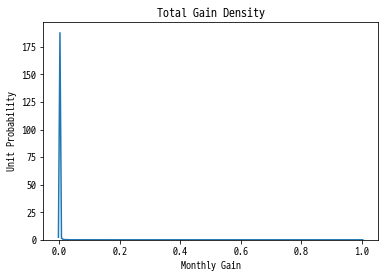

In [59]:
ax = plt.subplots()
ax = sns.distplot(input_data['monthly_gain'], hist=False)
ax.set_title('Total Gain Density')
ax.set_xlabel('Monthly Gain')
ax.set_ylabel('Unit Probability')
print(input_data['monthly_gain'].value_counts())

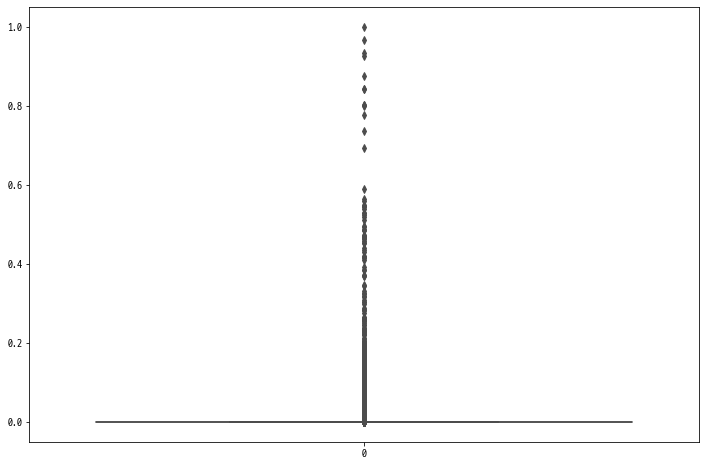

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(data=input_data['monthly_gain'], color='red')
plt.show()

# Data Split

In [61]:
input_data_y = input_data['monthly_gain'].copy()
input_data_X = input_data.drop(['monthly_gain'], axis=1)

In [62]:
from sklearn.model_selection import train_test_split

tr_val_X, test_X, tr_val_y, test_y = train_test_split(
    input_data_X, 
    input_data_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42)      

train_X, valid_X, train_y, valid_y = train_test_split(
    tr_val_X, 
    tr_val_y, 
    test_size = 0.2,      
    shuffle=True,         
    random_state=42)   

# Modeling
- XGB
- LGBM

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit,GridSearchCV
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from lightgbm import plot_importance 
from xgboost import XGBRegressor
from xgboost import plot_importance

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [65]:
model_xgb = XGBRegressor(n_estimators=500, learning_rate=0.05)

model_xgb.fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(valid_X, valid_y)],verbose=True)  #logloss 는 classification 평가용
pred_xgb = model_xgb.predict(test_X)

[0]	validation_0-rmse:0.47439
[1]	validation_0-rmse:0.45069
[2]	validation_0-rmse:0.42818
[3]	validation_0-rmse:0.40679
[4]	validation_0-rmse:0.38647
[5]	validation_0-rmse:0.36717
[6]	validation_0-rmse:0.34884
[7]	validation_0-rmse:0.33142
[8]	validation_0-rmse:0.31488
[9]	validation_0-rmse:0.29916
[10]	validation_0-rmse:0.28424
[11]	validation_0-rmse:0.27004
[12]	validation_0-rmse:0.25657
[13]	validation_0-rmse:0.24376
[14]	validation_0-rmse:0.23159
[15]	validation_0-rmse:0.22002
[16]	validation_0-rmse:0.20905
[17]	validation_0-rmse:0.19861
[18]	validation_0-rmse:0.18870
[19]	validation_0-rmse:0.17928
[20]	validation_0-rmse:0.17033
[21]	validation_0-rmse:0.16183
[22]	validation_0-rmse:0.15376
[23]	validation_0-rmse:0.14609
[24]	validation_0-rmse:0.13880
[25]	validation_0-rmse:0.13188
[26]	validation_0-rmse:0.12530
[27]	validation_0-rmse:0.11905
[28]	validation_0-rmse:0.11311
[29]	validation_0-rmse:0.10747
[30]	validation_0-rmse:0.10212
[31]	validation_0-rmse:0.09703
[32]	validation_0-

In [66]:
model_lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.05)

model_lgbm.fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(valid_X, valid_y)], verbose=True)  
pred_lgbm = model_lgbm.predict(test_X)

/usr/local/lib/python3.6/dist-packages/lightgbm/sklearn.py:734: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.6/dist-packages/lightgbm/sklearn.py:744: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 0.000174486
[2]	valid_0's l2: 0.00016784
[3]	valid_0's l2: 0.00016381
[4]	valid_0's l2: 0.000158032
[5]	valid_0's l2: 0.000152902
[6]	valid_0's l2: 0.000147442
[7]	valid_0's l2: 0.000142095
[8]	valid_0's l2: 0.000138316
[9]	valid_0's l2: 0.000134781
[10]	valid_0's l2: 0.000131684
[11]	valid_0's l2: 0.00012729
[12]	valid_0's l2: 0.000123486
[13]	valid_0's l2: 0.00012197
[14]	valid_0's l2: 0.000119622
[15]	valid_0's l2: 0.000116711
[16]	valid_0's l2: 0.0001135
[17]	valid_0's l2: 0.000112207
[18]	valid_0's l2: 0.00010996
[19]	valid_0's l2: 0.000108039
[20]	valid_0's l2: 0.000105859
[21]	valid_0's l2: 0.00010356
[22]	valid_0's l2: 0.00010171
[23]	valid_0's l2: 9.99037e-05
[24]	valid_0's l2: 9.84586e-05
[25]	valid_0's l2: 9.65887e-05
[26]	valid_0's l2: 9.42827e-05
[27]	valid_0's l2: 9.21637e-05
[28]	valid_0's l2: 8.96653e-05
[29]	valid_0's l2: 8.71593e-05
[30]	valid_0's l2: 8.52389e-05
[31]	valid_0's l2: 8.33357e-05
[32]	valid_0's l2: 8.23297e-05
[33]	valid_0's l2: 8.07373

## Prediction

In [67]:
def plot_history(history):
    #hist = pd.DataFrame(history.history)
    #history['epoch'] = history.epoch
    
    plt.figure(figsize=(8,12))
    
    # Mean Abs Error : 평균 절대 오차, 측정값에서 오차의 크기로 측정값과 실제값과의 차이, 절대 오차의 평균  
    # -> 측정하고자 하는 값을 정확하게 측정하지 못함으로써 발생
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.legend()
    
    # Mean Square Error : 평균 제곱 오차, 오차의 제복에 대한 평균을 취한 값
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.legend()
    plt.show()
    
def show_pred(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    
    df_result = pd.DataFrame(list(zip(true_y, pred)), columns=['true_y', 'prediction'])
    return df_result

def show_mse_rmse(test_y, pred) :
    mse = mean_squared_error(test_y, pred)
    print("mse : %f" % mse)
    
    rmse = np.sqrt(mse)
    print("rmse: %f \n" %rmse)
    
def show_prediction_error(test_y, pred) :
    true_y = test_y.to_numpy()
    true_y = np.ravel(true_y)
    error = pred - true_y
    plt.hist(error, bins=25)
    plt.xlabel("Prediction Error")
    _ = plt.ylabel("Count")
    
def feature_importance(model_xgb) : 
    %matplotlib inline
    plt.rcParams['axes.unicode_minus'] = False
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = fm.FontProperties(fname=font_path).get_name()
    rc('font', family=font)

    fig, ax = plt.subplots(figsize=(10,12))
    plot_importance(model_xgb, ax=ax)
    
def graph(pred, test_label) :
    plt.figure(figsize=(16, 9))
    plt.plot(test_label, label = 'actual')
    plt.plot(pred, label = 'prediction')
    plt.legend()
    plt.show()

In [68]:
show_pred(test_y, pred_xgb)

,true_y,prediction
0,0.000429,5.793917e-04
1,0.000025,1.255344e-04
2,0.000014,-1.174529e-04
3,0.000004,8.527603e-07
4,0.000005,1.087279e-04
...,...,...
29953,0.000032,1.226009e-04
29954,0.000072,2.061832e-04
29955,0.000476,4.606678e-05
29956,0.000356,4.947323e-04
